<a href="https://colab.research.google.com/github/rmahesh6386/DataScience_Python/blob/main/Assignment_10_Decision_Tree_Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [89]:
# import some data to play with
Fraud  = pd.read_csv('Fraud_check.csv')

In [90]:
Fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [91]:
Fraud.describe().T

,count,mean,std,min,25%,50%,75%,max
Taxable.Income,600.0,55208.375000,26204.827597,10003.0,32871.50,55074.5,78611.75,99619.0
City.Population,600.0,108747.368333,49850.075134,25779.0,66966.75,106493.5,150114.25,199778.0
Work.Experience,600.0,15.558333,8.842147,0.0,8.00,15.0,24.00,30.0


In [92]:
Fraud.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [93]:
Fraud.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [94]:
Fraud.shape

(600, 6)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


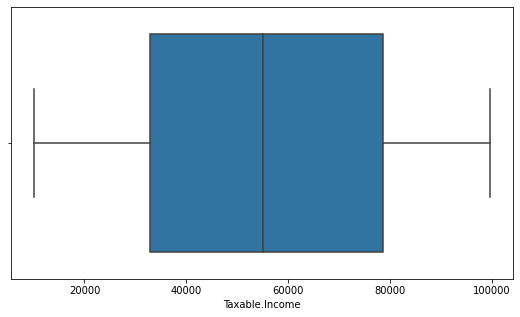

In [95]:
sns.boxplot(Fraud['Taxable.Income'])

  
  there are no outliers 

In [96]:
plt.rcParams["figure.figsize"] = 9,5

Skew: 0.030014788906377175
Kurtosis: -1.1997824607083138


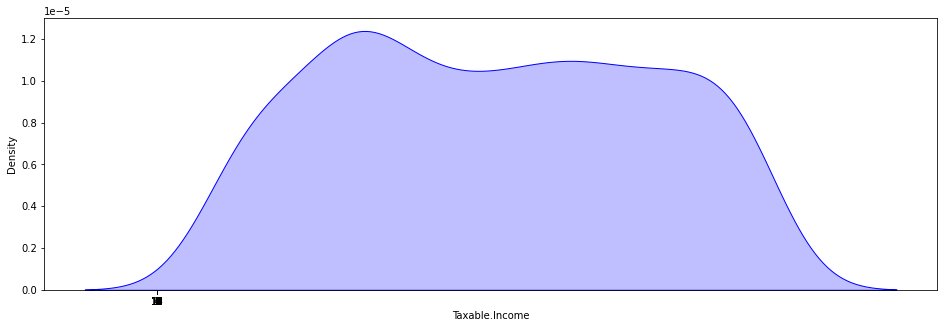

In [97]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(Fraud['Taxable.Income'].skew()))
print("Kurtosis: {}".format(Fraud['Taxable.Income'].kurtosis()))
ax = sns.kdeplot(Fraud['Taxable.Income'],shade=True,color='b')
plt.xticks([i for i in range(0,20,1)])
plt.show()

The data is Skewed on the right 

The data has negative Kurtosis

In [98]:
#Complete fraudFraudset
label_encoder = preprocessing.LabelEncoder()
Fraud['Undergrad'] = label_encoder.fit_transform(Fraud['Undergrad'])
Fraud['Marital.Status'] = label_encoder.fit_transform(Fraud['Marital.Status'])
Fraud['Urban'] = label_encoder.fit_transform(Fraud['Urban'])

In [99]:
Fraud.rename(columns = {'Marital.Status' : 'marital_status', 'Taxable.Income': 'tax_in', 'City.Population': 'city_popu',
                    'Work.Experience': 'work_exp'}, inplace= True)

In [100]:
Fraud.loc[Fraud["tax_in"]>=30000,"income"]="Good"
Fraud.loc[Fraud["tax_in"]<=30000,"income"]="Risky"

In [101]:
Fraud.drop(['tax_in'], axis=1, inplace=True)

In [102]:
Fraud['income']= label_encoder.fit_transform(Fraud['income']) 

In [103]:
Fraud

,Undergrad,marital_status,city_popu,work_exp,Urban,income
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0
...,...,...,...,...,...,...
595,1,0,39492,7,1,0
596,1,0,55369,2,1,0
597,0,0,154058,0,1,0
598,1,1,180083,17,0,0


In [104]:
corr = Fraud.corr()
corr

,Undergrad,marital_status,city_popu,work_exp,Urban,income
Undergrad,1.000000,0.042407,0.079579,-0.005362,-0.000267,0.012523
marital_status,0.042407,1.000000,-0.001564,-0.002213,0.064562,0.006081
city_popu,0.079579,-0.001564,1.000000,0.013135,-0.040098,0.012225
work_exp,-0.005362,-0.002213,0.013135,1.000000,-0.094559,-0.001972
Urban,-0.000267,0.064562,-0.040098,-0.094559,1.000000,0.004830
income,0.012523,0.006081,0.012225,-0.001972,0.004830,1.000000


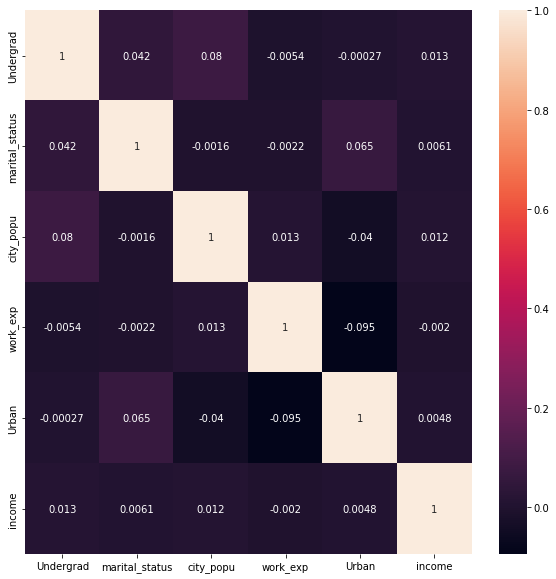

In [105]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

In [106]:
x=Fraud.iloc[:,0:5]
y=Fraud['income']

In [107]:
x

,Undergrad,marital_status,city_popu,work_exp,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [108]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: income, Length: 600, dtype: int64

In [109]:
Fraud.income.value_counts()

0    476
1    124
Name: income, dtype: int64

In [110]:
# Splitting Fraud into training and testing Fraud set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

### Building Decision Tree Classifier using Entropy Criteria

In [111]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

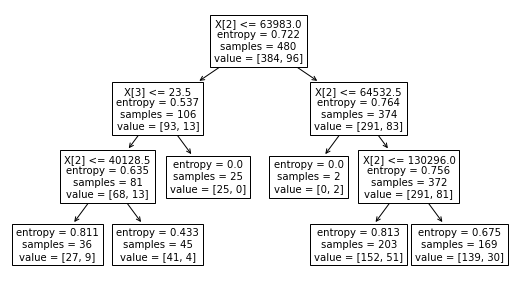

In [112]:
#PLot the decision tree
tree.plot_tree(model);


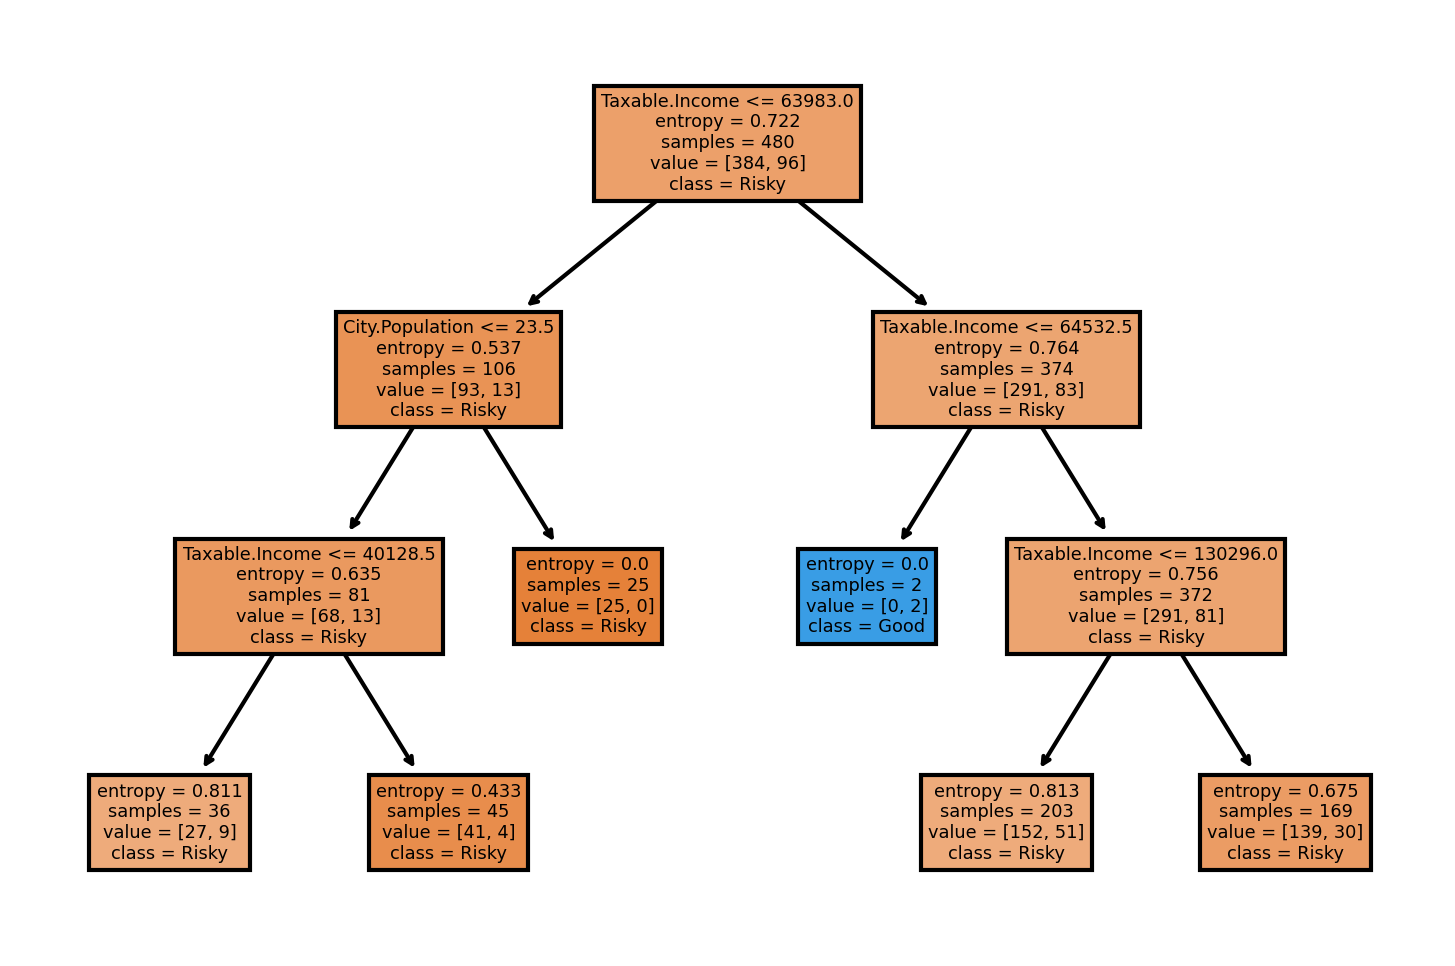

In [113]:
fn = ['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population', 'Work.Experiance', 'Urban']
cn = ['Risky', 'Good']
fig, axes = plt.subplots(nrows=1, ncols=1, figsize= (6,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn,
               class_names = cn,
               filled = True);

In [114]:
#Predicting on test Fraud
preds = model.predict(x_test) # predicting on test Fraud set 
pd.Series(preds).value_counts() # getting the count of each category 

0    120
dtype: int64

In [115]:
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [116]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0
income,
0,92
1,28


In [117]:
# Accuracy 
np.mean(preds==y_test)

0.7666666666666667

### Building Decision Tree Classifier (CART) using Gini Criteria

In [118]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [119]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [120]:
#Prediction and computing the accuracy
pred_gini=model_gini.predict(x_test)
np.mean(pred_gini==y_test)

0.7583333333333333

#### Decision Tree Regression Example

In [121]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [122]:
array = Fraud.values
X = array[:,0:5]
y = array[:,5]

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [124]:
model_reg = DecisionTreeRegressor()
model_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [125]:
#Find the accuracy
model_reg.score(X_test,y_test)

-1.224367088607595

Conclusion

In [126]:
model.feature_importances_

array([0.        , 0.        , 0.71003667, 0.28996333, 0.        ])

In [127]:
fi = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)


In [128]:
fi

,feature,importance
2,city_popu,0.710037
3,work_exp,0.289963
0,Undergrad,0.000000
1,marital_status,0.000000
4,Urban,0.000000
